# Preprocesamiento de los datos

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
sys.path.append('../src') # permite importar modulos locales
from arff_helper import DataSet
from ds_preprocessing import DataSetPreprocessor

## Dataset original

In [3]:
ds = DataSet()
ds.load_from_arff('../datasets/Autism-Adult-Training-Subset.arff')
ds.pandas_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,0,1,1,1,1,1,1,1,1,38.0,m,White-European,no,no,Germany,no,18 and more,Self,YES
1,1,1,1,1,1,0,0,1,1,1,36.0,f,White-European,no,yes,United Kingdom,no,18 and more,Self,YES
2,1,0,1,1,1,1,1,1,1,1,28.0,f,White-European,no,yes,Australia,no,18 and more,Self,YES
3,1,0,1,0,1,1,1,1,0,0,21.0,m,Hispanic,no,no,United States,no,18 and more,Self,NO
4,1,1,0,0,0,0,0,0,0,0,32.0,f,None,no,yes,Jordan,no,18 and more,None,NO
5,0,0,0,0,0,0,1,0,0,1,27.0,m,Asian,no,no,Sri Lanka,no,18 and more,Self,NO
6,0,1,0,0,1,1,0,1,1,0,24.0,m,Asian,no,no,New Zealand,no,18 and more,Self,NO
7,0,0,0,0,0,0,0,1,0,0,28.0,f,Asian,yes,no,India,no,18 and more,Self,NO
8,0,0,0,0,0,0,0,0,0,0,27.0,f,Black,no,no,United Arab Emirates,no,18 and more,Self,NO
9,0,0,1,0,0,0,0,1,0,0,28.0,f,Asian,no,no,India,no,18 and more,Parent,NO


## Análisis del atributo ```age```

In [4]:
print('MIN(\'age\') = {}'.format(ds.pandas_df['age'].min()))
print('MAX(\'age\') = {}'.format(ds.pandas_df['age'].max()))

MIN('age') = 17.0
MAX('age') = 383.0


Podría considerarse la instancia que toma el valor 383 como outlier. Una opción es sacarlo del dataset.

A continuación se realiza un histograma para el atributo 'age'. El histograma es una función que aproxima la función de densidad que siguen los datos (mas info sobre histogramas con matplotlib [aquí](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)). Además, se compara el histograma con la función de densidad $N(\mu, \sigma)$ en donde :

 - Se aproxima $\mu$ con la media calculado con el método ```mean``` de ```numpy```
 - Se aproxima $\sigma$ con la desviación estandar calculada con el método ```std``` de ```numpy```

In [5]:
y = ds.pandas_df['age'].dropna()\
    .as_matrix()
mu = np.mean(y)
sigma = np.std(y)

print('\nmu = {}'.format(mu))
print('sigma = {}\n'.format(sigma))


mu = 30.119217081850532
sigma = 17.757310782316654



21


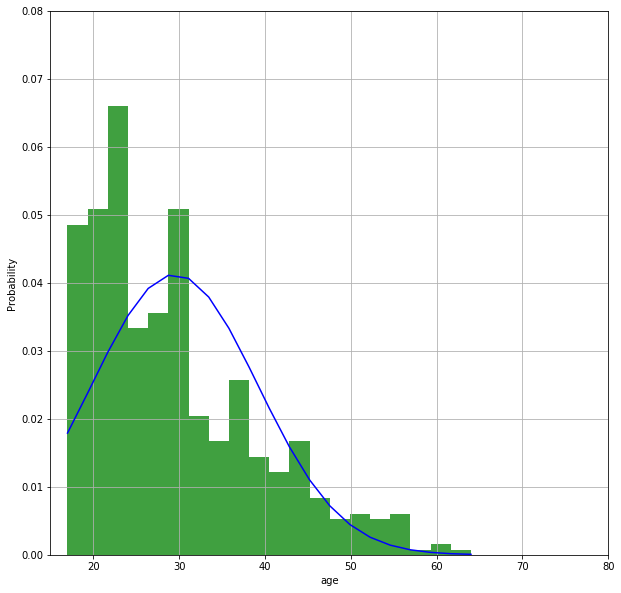

In [101]:
plt.figure(figsize=(10,10))
plt.xlabel('age')
plt.ylabel('Probability')
plt.axis([15, 80, 0, 0.08])
plt.grid(True)


n, bins, patches = plt.hist(y, 20, density=True, facecolor='g', alpha=0.75)
plt.plot(bins, norm.pdf(bins, mu, sigma), color='b')
print(len(bins))

plt.show()

Probamos sacar el valor outlier encontrado antes (383)

In [105]:
y = np.delete(y, np.where(y == 383))
mu = np.mean(y)
sigma = np.std(y)

print('\nmu = {}'.format(mu))
print('sigma = {}\n'.format(sigma))


mu = 29.49019607843137
sigma = 9.670525636875203



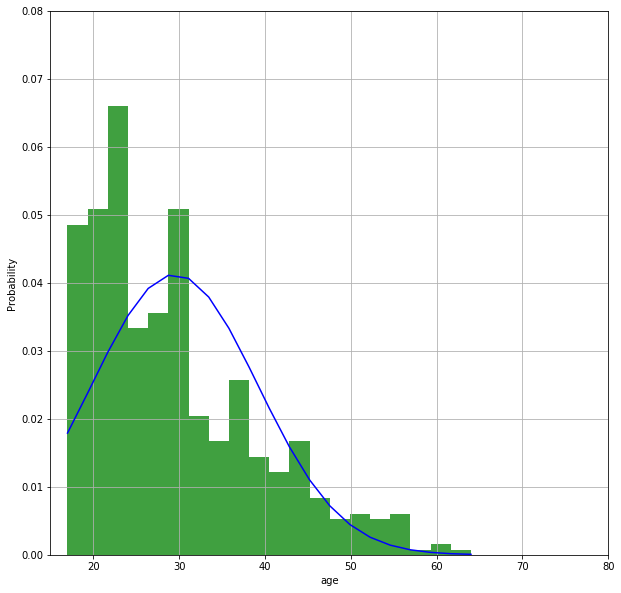

In [109]:
plt.figure(figsize=(10,10))
plt.xlabel('age')
plt.ylabel('Probability')
plt.axis([15, 80, 0, 0.08])
plt.grid(True)

n, bins, patches = plt.hist(y, 20, density=True, facecolor='g', alpha=0.75)
plt.plot(bins, norm.pdf(bins, mu, sigma), color='b')

plt.show()

Notas: 
 - En general conviene generar la misma gráfica (misma cantidad de bins, mismo rango en los ejes, etc.)
 - Podría ajustar mejor con una distribución normal que tenga un $\mu$ menor a los anteriores

## Preprocesamiento para el algoritmo K-NN

Lo que se hace aquí es convertir el dataset original en otro con solamente atributos numéricos. Esto permite que se pueda medir la distancia euclidiana entre instancias.

In [9]:
dsp = DataSetPreprocessor(ds, target_attribute='Class/ASD')
dsp.transform_to_rn()

,Class/ASD,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_Finland,contry_of_res_Armenia,used_app_before_no,used_app_before_yes,age_desc_18 and more,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,YES,1,0,1,1,1,1,1,1,1,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
1,YES,1,1,1,1,1,0,0,1,1,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
2,YES,1,0,1,1,1,1,1,1,1,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
3,NO,1,0,1,0,1,1,1,1,0,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
4,NO,1,1,0,0,0,0,0,0,0,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
5,NO,0,0,0,0,0,0,1,0,0,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
6,NO,0,1,0,0,1,1,0,1,1,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
7,NO,0,0,0,0,0,0,0,1,0,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
8,NO,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0
9,NO,0,0,1,0,0,0,0,1,0,...,0,0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0
